In [2]:
import matplotlib.pyplot as plt
import config
from datetime import datetime

from job.extraction import extract
from job.transformation import transform

In [3]:
data = extract(config.GOOGLE_CREDENTIALS_POLITICIANS)
sentiments_dict = transform(data["df"], data["websites"])

/home/brudhu/projetos/pessoais/politicians_analysis/data_analysis/job/transformation/percentages/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  percentage = values[keyword]["dfs"][website]["headline"].count() / sentiments_dict["all"][keyword]["dfs"][website]["headline"].count()


In [64]:
week_date_format = '%Y-%W-1'


def set_brazilian_timezone(df):
    df.loc[:, "onlineStartDate"] = df["onlineStartDate"].dt.tz_convert(
        "America/Sao_Paulo")
    df.loc[:, "onlineEndDate"] = df["onlineEndDate"].dt.tz_convert(
        "America/Sao_Paulo")
    return df


def set_initial_analysis_date(df, isodate_str):
    df = df[(df['onlineStartDate'] >= isodate_str)]
    return df

In [65]:
df = data["df"]

df = df.copy()
df = set_initial_analysis_date(df, "2020-05-06 00:00:00")
df = set_brazilian_timezone(df)

df_bolsonaro = df[(df["keywords"].apply(lambda x: "Bolsonaro" in x))].copy()
df_moro = df[(df["keywords"].apply(lambda x: "Moro" in x))].copy()
df_lula = df[(df["keywords"].apply(lambda x: "Lula" in x))].copy()
df_doria = df[(df["keywords"].apply(lambda x: "Doria" in x))].copy()
df_weintraub = df[(df["keywords"].apply(lambda x: "Weintraub" in x))].copy()
df_salles = df[(df["keywords"].apply(lambda x: "Salles" in x))].copy()

In [66]:
df_bolsonaro["week"] = df_bolsonaro["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_bolsonaro_group = df_bolsonaro.groupby("week").describe()

df_moro["week"] = df_moro["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_moro_group = df_moro.groupby("week").describe()

df_lula["week"] = df_lula["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_lula_group = df_lula.groupby("week").describe()

df_doria["week"] = df_doria["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_doria_group = df_doria.groupby("week").describe()

df_weintraub["week"] = df_weintraub["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_weintraub_group = df_weintraub.groupby("week").describe()

df_salles["week"] = df_salles["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_salles_group = df_salles.groupby("week").describe()

Text(0, 0.5, 'Count')

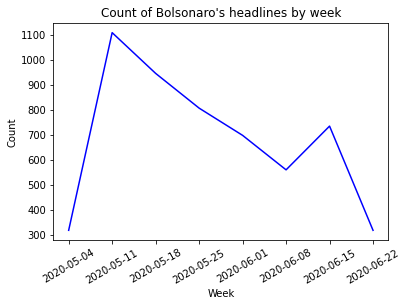

In [67]:
plt.plot(df_bolsonaro_group.index, df_bolsonaro_group["sentimentScore"]["count"], color="blue")
plt.title("Count of Bolsonaro's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

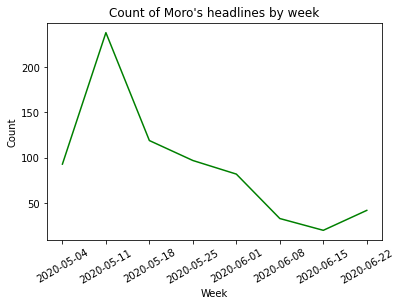

In [68]:
plt.plot(df_moro_group.index, df_moro_group["sentimentScore"]["count"], color="green")
plt.title("Count of Moro's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

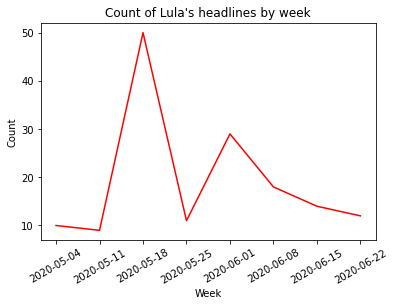

In [69]:
plt.plot(df_lula_group.index, df_lula_group["sentimentScore"]["count"], color="red")
plt.title("Count of Lula's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

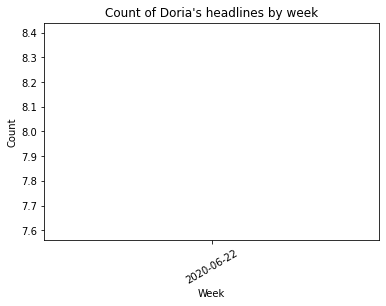

In [70]:
plt.plot(df_doria_group.index, df_doria_group["sentimentScore"]["count"], color="orange")
plt.xticks(rotation=30)
plt.title("Count of Doria's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

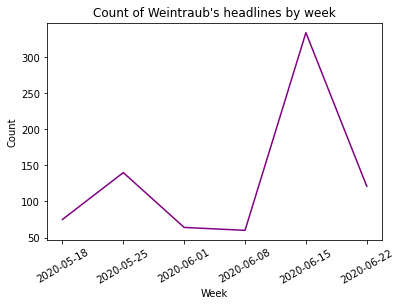

In [71]:
plt.plot(df_weintraub_group.index, df_weintraub_group["sentimentScore"]["count"], color="purple")
plt.title("Count of Weintraub's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

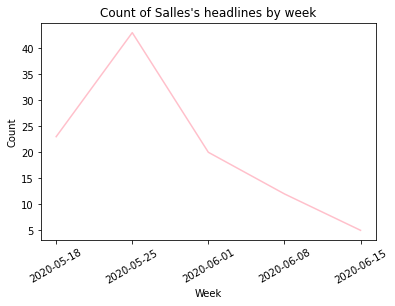

In [72]:
plt.plot(df_salles_group.index, df_salles_group["sentimentScore"]["count"], color="pink")
plt.title("Count of Salles's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

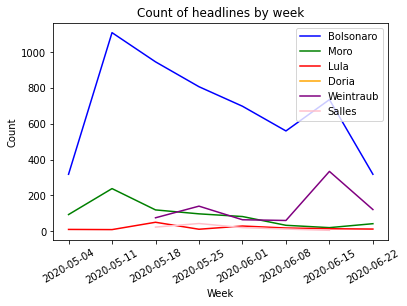

In [73]:
plt.plot(df_bolsonaro_group.index, df_bolsonaro_group["sentimentScore"]["count"], color="blue")
plt.plot(df_moro_group.index, df_moro_group["sentimentScore"]["count"], color="green")
plt.plot(df_lula_group.index, df_lula_group["sentimentScore"]["count"], color="red")
plt.plot(df_doria_group.index, df_doria_group["sentimentScore"]["count"], color="orange")
plt.plot(df_weintraub_group.index, df_weintraub_group["sentimentScore"]["count"], color="purple")
plt.plot(df_salles_group.index, df_salles_group["sentimentScore"]["count"], color="pink")

plt.legend(["Bolsonaro", "Moro", "Lula", "Doria", "Weintraub", "Salles"])
plt.title("Count of headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

# Bolsonaro

Text(0, 0.5, 'Average sentiment score')

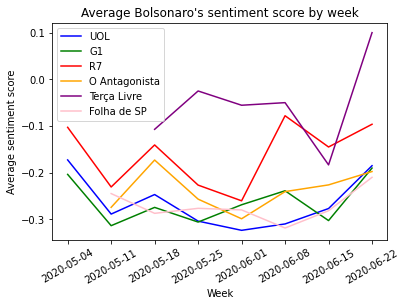

In [74]:
all_sentiments_dict = sentiments_dict["all"]

df_uol_all = all_sentiments_dict["Bolsonaro"]["dfs"]["UOL"]
df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_week_group = df_uol_all.groupby("week").describe()
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["mean"], color="blue")

df_g1_all = all_sentiments_dict["Bolsonaro"]["dfs"]["G1"]
df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_week_group = df_g1_all.groupby("week").describe()
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["mean"], color="green")

df_r7_all = all_sentiments_dict["Bolsonaro"]["dfs"]["R7"]
df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_week_group = df_r7_all.groupby("week").describe()
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["mean"], color="red")

df_antagonista_all = all_sentiments_dict["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_week_group = df_antagonista_all.groupby("week").describe()
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["mean"], color="orange")

df_tercalivre_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_week_group = df_tercalivre_all.groupby("week").describe()
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["mean"], color="purple")

df_folha_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_week_group = df_folha_all.groupby("week").describe()
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["mean"], color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Average Bolsonaro's sentiment score by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Average sentiment score")

Text(0, 0.5, 'Count')

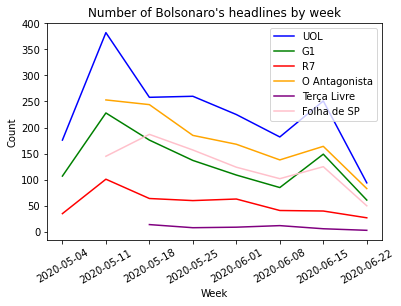

In [75]:
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["count"], color="blue")
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["count"], color="green")
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["count"], color="red")
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["count"], color="orange")
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["count"], color="purple")
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["count"], color="pink")
plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Number of Bolsonaro's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Percentage of negative headlines')

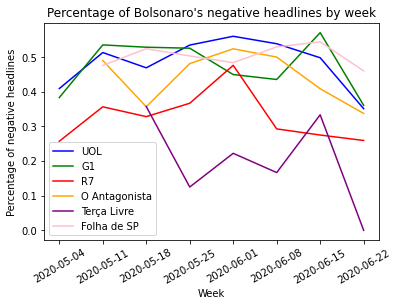

In [76]:
df_uol_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_negatives["week"] = df_uol_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_negatives_count = df_uol_negatives.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_negative_percentages_by_day = df_uol_negatives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_negative_percentages_by_day = uol_negative_percentages_by_day.fillna(0)


df_g1_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_negatives["week"] = df_g1_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_negatives_count = df_g1_negatives.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_negative_percentages_by_day = df_g1_negatives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_negative_percentages_by_day = g1_negative_percentages_by_day.fillna(0)


df_r7_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_negatives["week"] = df_r7_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_negatives_count = df_r7_negatives.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_negative_percentages_by_day = df_r7_negatives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_negative_percentages_by_day = r7_negative_percentages_by_day.fillna(0)


df_antagonista_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_negatives["week"] = df_antagonista_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_negatives_count = df_antagonista_negatives.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_negative_percentages_by_day = df_antagonista_negatives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_negative_percentages_by_day = antagonista_negative_percentages_by_day.fillna(0)


df_tercalivre_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Terça Livre"]

df_tercalivre_negatives["week"] = df_tercalivre_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_negatives_count = df_tercalivre_negatives.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_negative_percentages_by_day = df_tercalivre_negatives_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_negative_percentages_by_day = tercalivre_negative_percentages_by_day.fillna(0)


# df_sensoincomum_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Senso Incomum"]

# df_sensoincomum_negatives["week"] = df_sensoincomum_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_negatives_count = df_sensoincomum_negatives.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_negative_percentages_by_day = df_sensoincomum_negatives_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_negative_percentages_by_day = sensoincomum_negative_percentages_by_day.fillna(0)


df_folha_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_negatives["week"] = df_folha_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_negatives_count = df_folha_negatives.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_negative_percentages_by_day = df_folha_negatives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_negative_percentages_by_day = folha_negative_percentages_by_day.fillna(0)


plt.plot(uol_negative_percentages_by_day.index, uol_negative_percentages_by_day.values, color="blue")
plt.plot(g1_negative_percentages_by_day.index, g1_negative_percentages_by_day.values, color="green")
plt.plot(r7_negative_percentages_by_day.index, r7_negative_percentages_by_day.values, color="red")
plt.plot(antagonista_negative_percentages_by_day.index, antagonista_negative_percentages_by_day.values, color="orange")
plt.plot(tercalivre_negative_percentages_by_day.index, tercalivre_negative_percentages_by_day.values, color="purple")
plt.plot(folha_negative_percentages_by_day.index, folha_negative_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Bolsonaro's negative headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of negative headlines")

Text(0, 0.5, 'Percentage of neutral headlines')

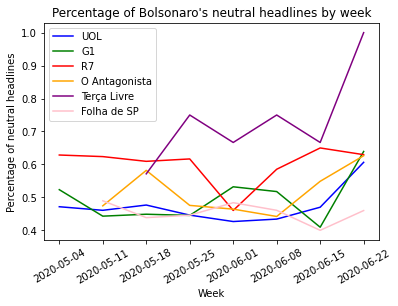

In [77]:
df_uol_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_neutrals["week"] = df_uol_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_neutrals_count = df_uol_neutrals.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_neutral_percentages_by_day = df_uol_neutrals_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_neutral_percentages_by_day = uol_neutral_percentages_by_day.fillna(0)


df_g1_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_neutrals["week"] = df_g1_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_neutrals_count = df_g1_neutrals.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_neutral_percentages_by_day = df_g1_neutrals_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_neutral_percentages_by_day = g1_neutral_percentages_by_day.fillna(0)


df_r7_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_neutrals["week"] = df_r7_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_neutrals_count = df_r7_neutrals.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_neutral_percentages_by_day = df_r7_neutrals_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_neutral_percentages_by_day = r7_neutral_percentages_by_day.fillna(0)


df_antagonista_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_neutrals["week"] = df_antagonista_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_neutrals_count = df_antagonista_neutrals.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_neutral_percentages_by_day = df_antagonista_neutrals_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_neutral_percentages_by_day = antagonista_neutral_percentages_by_day.fillna(0)


df_tercalivre_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Terça Livre"]

df_tercalivre_neutrals["week"] = df_tercalivre_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_neutrals_count = df_tercalivre_neutrals.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_neutral_percentages_by_day = df_tercalivre_neutrals_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_neutral_percentages_by_day = tercalivre_neutral_percentages_by_day.fillna(0)


# df_sensoincomum_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Senso Incomum"]

# df_sensoincomum_neutrals["week"] = df_sensoincomum_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_neutrals_count = df_sensoincomum_neutrals.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_neutral_percentages_by_day = df_sensoincomum_neutrals_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_neutral_percentages_by_day = sensoincomum_neutral_percentages_by_day.fillna(0)


df_folha_neutrals = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_neutrals["week"] = df_folha_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_neutrals_count = df_folha_neutrals.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_neutral_percentages_by_day = df_folha_neutrals_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_neutral_percentages_by_day = folha_neutral_percentages_by_day.fillna(0)


plt.plot(uol_neutral_percentages_by_day.index, uol_neutral_percentages_by_day.values, color="blue")
plt.plot(g1_neutral_percentages_by_day.index, g1_neutral_percentages_by_day.values, color="green")
plt.plot(r7_neutral_percentages_by_day.index, r7_neutral_percentages_by_day.values, color="red")
plt.plot(antagonista_neutral_percentages_by_day.index, antagonista_neutral_percentages_by_day.values, color="orange")
plt.plot(tercalivre_neutral_percentages_by_day.index, tercalivre_neutral_percentages_by_day.values, color="purple")
plt.plot(folha_neutral_percentages_by_day.index, folha_neutral_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Bolsonaro's neutral headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of neutral headlines")

Text(0, 0.5, 'Percentage of positive headlines')

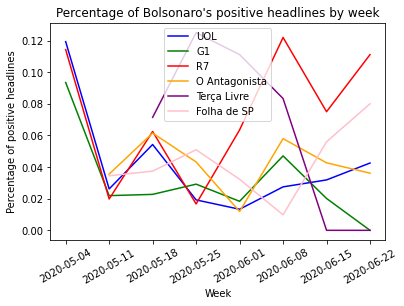

In [78]:
df_uol_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_positives["week"] = df_uol_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_positives_count = df_uol_positives.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_positive_percentages_by_day = df_uol_positives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_positive_percentages_by_day = uol_positive_percentages_by_day.fillna(0)


df_g1_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_positives["week"] = df_g1_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_positives_count = df_g1_positives.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_positive_percentages_by_day = df_g1_positives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_positive_percentages_by_day = g1_positive_percentages_by_day.fillna(0)


df_r7_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_positives["week"] = df_r7_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_positives_count = df_r7_positives.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_positive_percentages_by_day = df_r7_positives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_positive_percentages_by_day = r7_positive_percentages_by_day.fillna(0)


df_antagonista_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_positives["week"] = df_antagonista_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_positives_count = df_antagonista_positives.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_positive_percentages_by_day = df_antagonista_positives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_positive_percentages_by_day = antagonista_positive_percentages_by_day.fillna(0)


df_tercalivre_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Terça Livre"]

df_tercalivre_positives["week"] = df_tercalivre_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_positives_count = df_tercalivre_positives.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_positive_percentages_by_day = df_tercalivre_positives_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_positive_percentages_by_day = tercalivre_positive_percentages_by_day.fillna(0)


# df_sensoincomum_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Senso Incomum"]

# df_sensoincomum_positives["week"] = df_sensoincomum_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_positives_count = df_sensoincomum_positives.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_positive_percentages_by_day = df_sensoincomum_positives_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_positive_percentages_by_day = sensoincomum_positive_percentages_by_day.fillna(0)


df_folha_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_positives["week"] = df_folha_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_positives_count = df_folha_positives.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_positive_percentages_by_day = df_folha_positives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_positive_percentages_by_day = folha_positive_percentages_by_day.fillna(0)


plt.plot(uol_positive_percentages_by_day.index, uol_positive_percentages_by_day.values, color="blue")
plt.plot(g1_positive_percentages_by_day.index, g1_positive_percentages_by_day.values, color="green")
plt.plot(r7_positive_percentages_by_day.index, r7_positive_percentages_by_day.values, color="red")
plt.plot(antagonista_positive_percentages_by_day.index, antagonista_positive_percentages_by_day.values, color="orange")
plt.plot(tercalivre_positive_percentages_by_day.index, tercalivre_positive_percentages_by_day.values, color="purple")
plt.plot(folha_positive_percentages_by_day.index, folha_positive_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Bolsonaro's positive headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of positive headlines")

# Weintraub

Text(0, 0.5, 'Average sentiment score')

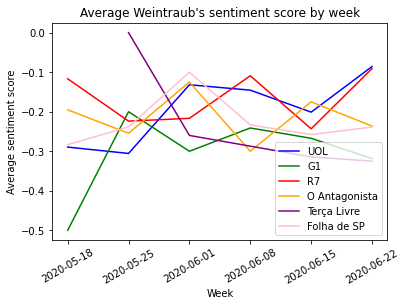

In [79]:
all_sentiments_dict = sentiments_dict["all"]

df_uol_all = all_sentiments_dict["Weintraub"]["dfs"]["UOL"]
df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_week_group = df_uol_all.groupby("week").describe()
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["mean"], color="blue")

df_g1_all = all_sentiments_dict["Weintraub"]["dfs"]["G1"]
df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_week_group = df_g1_all.groupby("week").describe()
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["mean"], color="green")

df_r7_all = all_sentiments_dict["Weintraub"]["dfs"]["R7"]
df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_week_group = df_r7_all.groupby("week").describe()
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["mean"], color="red")

df_antagonista_all = all_sentiments_dict["Weintraub"]["dfs"]["O Antagonista"]
df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_week_group = df_antagonista_all.groupby("week").describe()
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["mean"], color="orange")

df_tercalivre_all = all_sentiments_dict["Weintraub"]["dfs"]["Terça Livre"]
df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_week_group = df_tercalivre_all.groupby("week").describe()
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["mean"], color="purple")

df_folha_all = all_sentiments_dict["Weintraub"]["dfs"]["Folha de SP"]
df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_week_group = df_folha_all.groupby("week").describe()
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["mean"], color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Average Weintraub's sentiment score by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Average sentiment score")

Text(0, 0.5, 'Count')

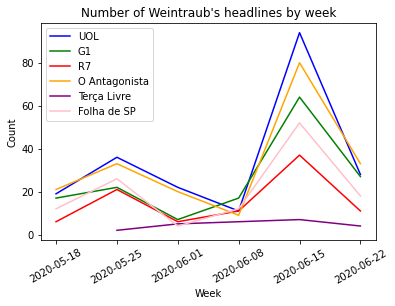

In [80]:
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["count"], color="blue")
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["count"], color="green")
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["count"], color="red")
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["count"], color="orange")
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["count"], color="purple")
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["count"], color="pink")
plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Number of Weintraub's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

Text(0, 0.5, 'Percentage of negative headlines')

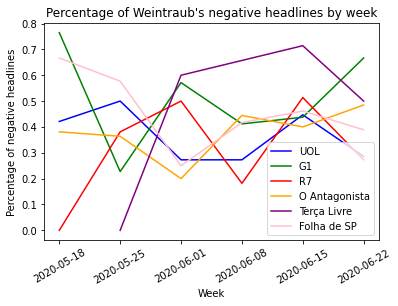

In [81]:
df_uol_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Weintraub"]["dfs"]["UOL"]

df_uol_negatives["week"] = df_uol_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_negatives_count = df_uol_negatives.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_negative_percentages_by_day = df_uol_negatives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_negative_percentages_by_day = uol_negative_percentages_by_day.fillna(0)


df_g1_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Weintraub"]["dfs"]["G1"]

df_g1_negatives["week"] = df_g1_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_negatives_count = df_g1_negatives.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_negative_percentages_by_day = df_g1_negatives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_negative_percentages_by_day = g1_negative_percentages_by_day.fillna(0)


df_r7_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Weintraub"]["dfs"]["R7"]

df_r7_negatives["week"] = df_r7_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_negatives_count = df_r7_negatives.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_negative_percentages_by_day = df_r7_negatives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_negative_percentages_by_day = r7_negative_percentages_by_day.fillna(0)


df_antagonista_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Weintraub"]["dfs"]["O Antagonista"]

df_antagonista_negatives["week"] = df_antagonista_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_negatives_count = df_antagonista_negatives.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_negative_percentages_by_day = df_antagonista_negatives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_negative_percentages_by_day = antagonista_negative_percentages_by_day.fillna(0)


df_tercalivre_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Terça Livre"]

df_tercalivre_negatives["week"] = df_tercalivre_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_negatives_count = df_tercalivre_negatives.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_negative_percentages_by_day = df_tercalivre_negatives_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_negative_percentages_by_day = tercalivre_negative_percentages_by_day.fillna(0)


# df_sensoincomum_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Senso Incomum"]

# df_sensoincomum_negatives["week"] = df_sensoincomum_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_negatives_count = df_sensoincomum_negatives.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_negative_percentages_by_day = df_sensoincomum_negatives_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_negative_percentages_by_day = sensoincomum_negative_percentages_by_day.fillna(0)


df_folha_negatives = sentiments_dict["negative"]["Weintraub"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Folha de SP"]

df_folha_negatives["week"] = df_folha_negatives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_negatives_count = df_folha_negatives.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_negative_percentages_by_day = df_folha_negatives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_negative_percentages_by_day = folha_negative_percentages_by_day.fillna(0)


plt.plot(uol_negative_percentages_by_day.index, uol_negative_percentages_by_day.values, color="blue")
plt.plot(g1_negative_percentages_by_day.index, g1_negative_percentages_by_day.values, color="green")
plt.plot(r7_negative_percentages_by_day.index, r7_negative_percentages_by_day.values, color="red")
plt.plot(antagonista_negative_percentages_by_day.index, antagonista_negative_percentages_by_day.values, color="orange")
plt.plot(tercalivre_negative_percentages_by_day.index, tercalivre_negative_percentages_by_day.values, color="purple")
plt.plot(folha_negative_percentages_by_day.index, folha_negative_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Weintraub's negative headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of negative headlines")

Text(0, 0.5, 'Percentage of neutral headlines')

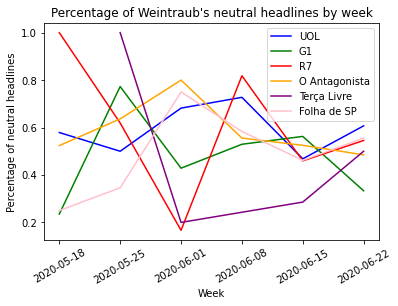

In [82]:
df_uol_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Weintraub"]["dfs"]["UOL"]

df_uol_neutrals["week"] = df_uol_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_neutrals_count = df_uol_neutrals.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_neutral_percentages_by_day = df_uol_neutrals_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_neutral_percentages_by_day = uol_neutral_percentages_by_day.fillna(0)


df_g1_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Weintraub"]["dfs"]["G1"]

df_g1_neutrals["week"] = df_g1_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_neutrals_count = df_g1_neutrals.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_neutral_percentages_by_day = df_g1_neutrals_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_neutral_percentages_by_day = g1_neutral_percentages_by_day.fillna(0)


df_r7_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Weintraub"]["dfs"]["R7"]

df_r7_neutrals["week"] = df_r7_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_neutrals_count = df_r7_neutrals.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_neutral_percentages_by_day = df_r7_neutrals_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_neutral_percentages_by_day = r7_neutral_percentages_by_day.fillna(0)


df_antagonista_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Weintraub"]["dfs"]["O Antagonista"]

df_antagonista_neutrals["week"] = df_antagonista_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_neutrals_count = df_antagonista_neutrals.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_neutral_percentages_by_day = df_antagonista_neutrals_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_neutral_percentages_by_day = antagonista_neutral_percentages_by_day.fillna(0)


df_tercalivre_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Terça Livre"]

df_tercalivre_neutrals["week"] = df_tercalivre_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_neutrals_count = df_tercalivre_neutrals.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_neutral_percentages_by_day = df_tercalivre_neutrals_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_neutral_percentages_by_day = tercalivre_neutral_percentages_by_day.fillna(0)


# df_sensoincomum_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Senso Incomum"]

# df_sensoincomum_neutrals["week"] = df_sensoincomum_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_neutrals_count = df_sensoincomum_neutrals.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_neutral_percentages_by_day = df_sensoincomum_neutrals_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_neutral_percentages_by_day = sensoincomum_neutral_percentages_by_day.fillna(0)


df_folha_neutrals = sentiments_dict["neutral"]["Weintraub"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Folha de SP"]

df_folha_neutrals["week"] = df_folha_neutrals["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_neutrals_count = df_folha_neutrals.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_neutral_percentages_by_day = df_folha_neutrals_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_neutral_percentages_by_day = folha_neutral_percentages_by_day.fillna(0)


plt.plot(uol_neutral_percentages_by_day.index, uol_neutral_percentages_by_day.values, color="blue")
plt.plot(g1_neutral_percentages_by_day.index, g1_neutral_percentages_by_day.values, color="green")
plt.plot(r7_neutral_percentages_by_day.index, r7_neutral_percentages_by_day.values, color="red")
plt.plot(antagonista_neutral_percentages_by_day.index, antagonista_neutral_percentages_by_day.values, color="orange")
plt.plot(tercalivre_neutral_percentages_by_day.index, tercalivre_neutral_percentages_by_day.values, color="purple")
plt.plot(folha_neutral_percentages_by_day.index, folha_neutral_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Weintraub's neutral headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of neutral headlines")

Text(0, 0.5, 'Percentage of positive headlines')

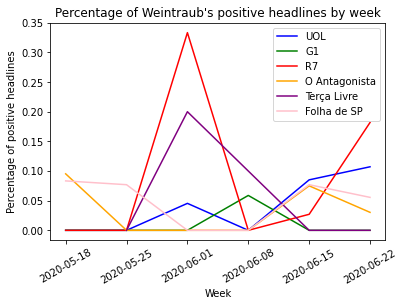

In [83]:
df_uol_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Weintraub"]["dfs"]["UOL"]

df_uol_positives["week"] = df_uol_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_positives_count = df_uol_positives.groupby("week").count()

df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_all_count = df_uol_all.groupby("week").count()
uol_positive_percentages_by_day = df_uol_positives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_positive_percentages_by_day = uol_positive_percentages_by_day.fillna(0)


df_g1_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Weintraub"]["dfs"]["G1"]

df_g1_positives["week"] = df_g1_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_positives_count = df_g1_positives.groupby("week").count()

df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_all_count = df_g1_all.groupby("week").count()
g1_positive_percentages_by_day = df_g1_positives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_positive_percentages_by_day = g1_positive_percentages_by_day.fillna(0)


df_r7_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Weintraub"]["dfs"]["R7"]

df_r7_positives["week"] = df_r7_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_positives_count = df_r7_positives.groupby("week").count()

df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_all_count = df_r7_all.groupby("week").count()
r7_positive_percentages_by_day = df_r7_positives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_positive_percentages_by_day = r7_positive_percentages_by_day.fillna(0)


df_antagonista_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Weintraub"]["dfs"]["O Antagonista"]

df_antagonista_positives["week"] = df_antagonista_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_positives_count = df_antagonista_positives.groupby("week").count()

df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_all_count = df_antagonista_all.groupby("week").count()
antagonista_positive_percentages_by_day = df_antagonista_positives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_positive_percentages_by_day = antagonista_positive_percentages_by_day.fillna(0)


df_tercalivre_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Terça Livre"]

df_tercalivre_positives["week"] = df_tercalivre_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_positives_count = df_tercalivre_positives.groupby("week").count()

df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_all_count = df_tercalivre_all.groupby("week").count()
tercalivre_positive_percentages_by_day = df_tercalivre_positives_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_positive_percentages_by_day = tercalivre_positive_percentages_by_day.fillna(0)


# df_sensoincomum_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Senso Incomum"]

# df_sensoincomum_positives["week"] = df_sensoincomum_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_positives_count = df_sensoincomum_positives.groupby("week").count()

# df_sensoincomum_all["week"] = df_sensoincomum_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("week").count()
# sensoincomum_positive_percentages_by_day = df_sensoincomum_positives_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_positive_percentages_by_day = sensoincomum_positive_percentages_by_day.fillna(0)


df_folha_positives = sentiments_dict["positive"]["Weintraub"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Weintraub"]["dfs"]["Folha de SP"]

df_folha_positives["week"] = df_folha_positives["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_positives_count = df_folha_positives.groupby("week").count()

df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_all_count = df_folha_all.groupby("week").count()
folha_positive_percentages_by_day = df_folha_positives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_positive_percentages_by_day = folha_positive_percentages_by_day.fillna(0)


plt.plot(uol_positive_percentages_by_day.index, uol_positive_percentages_by_day.values, color="blue")
plt.plot(g1_positive_percentages_by_day.index, g1_positive_percentages_by_day.values, color="green")
plt.plot(r7_positive_percentages_by_day.index, r7_positive_percentages_by_day.values, color="red")
plt.plot(antagonista_positive_percentages_by_day.index, antagonista_positive_percentages_by_day.values, color="orange")
plt.plot(tercalivre_positive_percentages_by_day.index, tercalivre_positive_percentages_by_day.values, color="purple")
plt.plot(folha_positive_percentages_by_day.index, folha_positive_percentages_by_day.values, color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Percentage of Weintraub's positive headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Percentage of positive headlines")

# Salles

AttributeError: Can only use .dt accessor with datetimelike values

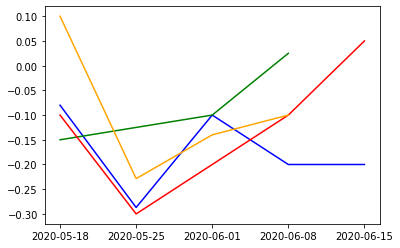

In [84]:
all_sentiments_dict = sentiments_dict["all"]

df_uol_all = all_sentiments_dict["Salles"]["dfs"]["UOL"]
df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_uol_week_group = df_uol_all.groupby("week").describe()
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["mean"], color="blue")

df_g1_all = all_sentiments_dict["Salles"]["dfs"]["G1"]
df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_g1_week_group = df_g1_all.groupby("week").describe()
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["mean"], color="green")

df_r7_all = all_sentiments_dict["Salles"]["dfs"]["R7"]
df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_r7_week_group = df_r7_all.groupby("week").describe()
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["mean"], color="red")

df_antagonista_all = all_sentiments_dict["Salles"]["dfs"]["O Antagonista"]
df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_antagonista_week_group = df_antagonista_all.groupby("week").describe()
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["mean"], color="orange")

df_tercalivre_all = all_sentiments_dict["Salles"]["dfs"]["Terça Livre"]
df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_tercalivre_week_group = df_tercalivre_all.groupby("week").describe()
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["mean"], color="purple")

df_folha_all = all_sentiments_dict["Salles"]["dfs"]["Folha de SP"]
df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime(week_date_format).apply(lambda x: datetime.strptime(x, "%Y-%W-%w")).dt.strftime('%Y-%m-%d')
df_folha_week_group = df_folha_all.groupby("week").describe()
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["mean"], color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Average Salles's sentiment score by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Average sentiment score")

Text(0, 0.5, 'Count')

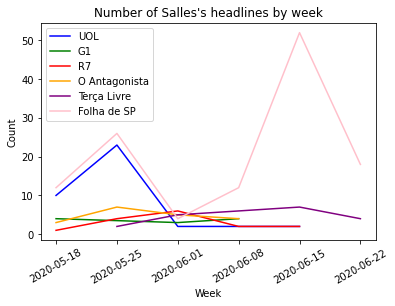

In [85]:
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["count"], color="blue")
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["count"], color="green")
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["count"], color="red")
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["count"], color="orange")
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["count"], color="purple")
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["count"], color="pink")
plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Number of Salles's headlines by week")
plt.xlabel("Week")
plt.xticks(rotation=30)
plt.ylabel("Count")

## Top Headlines

### Bolsonaro

In [86]:

for index, row in df_bolsonaro.sort_values("sentimentScore").head(10)[["website", "headline", "headlineEnglish", "sentimentScore"]].iterrows():
    print(f"Site: {row['website']}\nManchete: {row['headline']}\nManchete (inglês): {row['headlineEnglish']}\nSentiment Score: {row['sentimentScore']}\n")

Site: UOL
Manchete: 'Bolsonaro é visto como um dos piores do mundo'
Manchete (inglês): 'Bolsonaro is seen as one of the worst in the world'
Sentiment Score: -0.8999999761581421

Site: Folha de SP
Manchete: Weintraub se tornou um obstáculo político para Bolsonaro
Manchete (inglês): Weintraub has become a political obstacle for Bolsonaro
Sentiment Score: -0.8999999761581421

Site: R7
Manchete: Bolsonaro:"'Isolamento total é um absurdo, o povo quer trabalhar'
Manchete (inglês): Bolsonaro:"'Total isolation is absurd, the people want to work'
Sentiment Score: -0.8999999761581421

Site: Folha de SP
Manchete: Flávio Bolsonaro afirma ser absurda suposição de interferência na PF
Manchete (inglês): Flávio Bolsonaro claims to be absurd assumption of interference in PF
Sentiment Score: -0.8999999761581421

Site: O Antagonista
Manchete: “O populismo de Bolsonaro está levando o Brasil ao desastre”
Manchete (inglês): "Bolsonaro's populism is driving Brazil to disaster"
Sentiment Score: -0.89999997615

In [91]:

for index, row in df_bolsonaro.sort_values("sentimentScore", ascending=False).head(20)[["website", "headline", "headlineEnglish", "sentimentScore"]].iterrows():
    print(f"Site: {row['website']}\nManchete: {row['headline']}\nManchete (inglês): {row['headlineEnglish']}\nSentiment Score: {row['sentimentScore']}\n")

Site: Folha de SP
Manchete: Flávio Bolsonaro elogia trabalho de presidente da Fundação Palmares
Manchete (inglês): Flávio Bolsonaro praises the work of president of the Palmares Foundation
Sentiment Score: 0.8999999761581421

Site: O Antagonista
Manchete: De Flávio Bolsonaro para Queiroz, com muito carinho, com muito amor
Manchete (inglês): From Flávio Bolsonaro to Queiroz, with great affection, with much love
Sentiment Score: 0.8999999761581421

Site: O Antagonista
Manchete: De Flávio Bolsonaro para Queiroz, com muito carinho, com muito amor
Manchete (inglês): From Flávio Bolsonaro to Queiroz, with great affection, with much love
Sentiment Score: 0.8999999761581421

Site: Folha de SP
Manchete: Amor à família é álibi perfeito para Bolsonaro
Manchete (inglês): Love to the family is perfect alibi for Bolsonaro
Sentiment Score: 0.8999999761581421

Site: O Antagonista
Manchete: De Flávio Bolsonaro para Queiroz, com muito carinho, com muito amor
Manchete (inglês): From Flávio Bolsonaro to Q